In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings; warnings.simplefilter('ignore')

In [2]:
file = pd.read_csv('results-survey150419.csv')
print("The total number of responses received is {}.\n".format(len(file)))
file = file.drop(file.columns[[range(0,6)]], axis=1)
file.rename(columns={file.columns[0]: 'Country', file.columns[1]: 'Business Category'\
                   , file.columns[2]: 'Business Category [Business Category - Other]'\
                   , file.columns[12]: 'Campaign Run'}, inplace=True)
file['Country'].replace(np.nan, "Other", inplace=True)

#Renaming Business Categories
file.replace(('Regulator/Government Agency', 'Internet eXchange Point (IXP)', 
                 'End-user (Home/Mobile broadband)', 'Academic Institution', 'Academic network (NRENs)',
                 'Internet Service Provider (ISP)', 'Telecom (Mobile) Operator','Wireless network',
                'Enterprise Network','ccTLD/DNS Operator','Community Network','Datacentre', 'Cable Operator'),
                ('Regulator/Govt', 'IXP', 'End User', 'Academic Network', 'Academic Network','ISP', 'ISP',
                 'ISP', 'Other', 'Other', 'Other', 'Other', 'Other'), 
                inplace=True)

The total number of responses received is 243.



In [3]:
#Elimate respondents with no single measurement answer.
df = file
df.dropna(subset=['Campaign Run'], inplace=True)
print("First Cleaning: Elimating responses with no single measurement answer")
print("Total Number of responses: {}".format(len(df)))
print("Number of countries that responded: {}".format(len(df['Country'].value_counts())-1))#minus 1 of 'Other'
print("Responses with no country specified: {}\n".format(len(df[df['Country'] == "Other"])))

#Dropping all responses with less than 80% completion rate
df = df.dropna(thresh=df.shape[1]-80) #drop rows where NaN values constituate up to 92 of the total entries
print("Second Cleaning: Eliminate respondents with less than 80% completion")
total_responses = len(df)
print("Total Number of responses: {}".format(total_responses))
print("Number of countries that responded: {}".format(len(df['Country'].value_counts())-1))#minus 1 of 'Other'
print("Responses with no country specified: {}\n".format(len(df[df['Country'] == "Other"])))

#Businesses that run measurement campaign
runm = len(df[['Business Category', 'Campaign Run']][df['Campaign Run']=="Yes"])
runperc = round(runm/len(df)*100, 2)
print("Total number of businesses than run some measurement campaign: {} or {}% of all responses"\
      .format(runm, runperc))

#Businesses that collect some measurement data
df.rename(columns={'8._Do_you_collect_data_for_the_metrics_selected_in_the_previous_question?\n\t\n\n\n\t\xa0':\
                   'Businesses Collecting Data'}, inplace=True)
mdata = len(df[['Business Category', 'Businesses Collecting Data']][df['Businesses Collecting Data']=="Yes"])
mdataper = round(mdata/len(df)*100, 2)
print("Total number of businesses that collect some measurement data: {} or {}% of all responses"\
      .format(mdata, mdataper))

#Number of Response by category
df1 = df.set_index('Business Category')

print("\nNumber of countries that responded: {}".format(len(df1['Country'].unique()) - 1))
count = {}
for i in df1.index.unique().tolist():
    name = str(i)
    length = len(df1.loc[name])
    count.update({name:length })
count

First Cleaning: Elimating responses with no single measurement answer
Total Number of responses: 162
Number of countries that responded: 35
Responses with no country specified: 10

Second Cleaning: Eliminate respondents with less than 80% completion
Total Number of responses: 136
Number of countries that responded: 35
Responses with no country specified: 7

Total number of businesses than run some measurement campaign: 32 or 23.53% of all responses
Total number of businesses that collect some measurement data: 74 or 54.41% of all responses

Number of countries that responded: 35


{'Other': 26,
 'End User': 13,
 'Academic Network': 35,
 'Regulator/Govt': 7,
 'IXP': 8,
 'ISP': 38,
 'Civil society': 9}

In [4]:
def makeup():
    countries={}
    for i in df['Country'].unique().tolist():
        if i != 'Other':
            name = str(i)
            length = len(df.loc[df['Country'] == name])
            countries.update({name:length })
    countries = {k: v for k, v in sorted(countries.items(), reverse=True, key=lambda x: x[1])} 
    return countries
makeup()

{'South Africa': 20,
 'Nigeria': 17,
 'Sudan': 9,
 'Uganda': 7,
 'Ethiopia': 7,
 'Burkina Faso': 5,
 'Kenya': 5,
 'Mauritius': 4,
 'Madagascar': 4,
 'Morocco': 4,
 'Ghana': 4,
 'Zimbabwe': 3,
 'Cameroon': 3,
 'Angola': 3,
 'Algeria': 3,
 'Egypt': 3,
 'Congo-Kinshasa': 2,
 'Reunion': 2,
 'Togo': 2,
 "Cote d'Ivoire": 2,
 'Mali': 2,
 'Malawi': 2,
 'Senegal': 2,
 'Rwanda': 2,
 'Tanzania': 2,
 'Central African Republic': 1,
 'Gambia': 1,
 'Botswana': 1,
 'Gabon': 1,
 'Benin': 1,
 'Chad': 1,
 'Zambia': 1,
 'Mozambique': 1,
 'Libya': 1,
 'Somalia': 1}

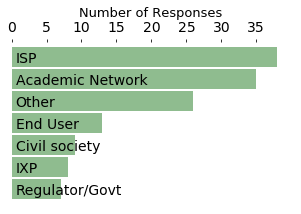

,Total Number of Responses,Number Running Campaign,% Running Campaign
ISP,38,7,18.42
Academic Network,35,7,20.00
Other,26,7,26.92
End User,13,4,30.77
Civil society,9,5,55.56
IXP,8,1,12.50
Regulator/Govt,7,1,14.29


In [5]:
#Number of responses by business category; and whether they run measurement campaign
def measurement_campaign():
    runcamp = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="Yes"]
    runcamp = runcamp.groupby('Business Category').agg({'Campaign Run': 'count'})
    responses = pd.Series(count)
    final = pd.concat([responses,runcamp], axis=1, join='outer')
    final.fillna(0, inplace=True)
    final['Campaign Run'] = final['Campaign Run'].astype(int)
    final.rename(columns={final.columns[0]: 'Total Number of Responses',
                 'Campaign Run':'Number Running Campaign'}, inplace=True)
    final = final.sort_values(by = ['Total Number of Responses'], ascending=False)
    final['% Running Campaign'] = round((final['Number Running Campaign'\
                                              ]/final['Total Number of Responses'])*100, 2)
    
    final_plot = final['Total Number of Responses']
    final_plot = final_plot.iloc[::-1] #Reversing the index to have the higher values on top
    
    ax = final_plot.plot(kind='barh', width=.9, figsize=(5,3), color='darkseagreen')
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-275)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,5,10,15,20,25,30,35])
    plt.savefig('figures/network_responses.pdf', bbox_inches = 'tight')
    plt.show()
    return final
measurement_campaign()

In [6]:
#Whether a business category has run some measurement or not
def measurement_data():
    mdata = df[['Business Category', 'Businesses Collecting Data']][df['Businesses Collecting Data']=="Yes"]
    mdata = mdata.groupby('Business Category').agg({'Businesses Collecting Data': 'count'})
    responses = pd.Series(count)
    final = pd.concat([responses, mdata], axis=1, join='outer')
    final.rename(columns={final.columns[0]: 'Total Number of Responses'}, inplace=True)    
    final['% Running Measurement'] = round((final['Businesses Collecting Data']\
                                            /final['Total Number of Responses'])*100, 2)
    final = final.sort_values(by = ['Total Number of Responses'], ascending=False)
    return final
measurement_data()

,Total Number of Responses,Businesses Collecting Data,% Running Measurement
ISP,38,26,68.42
Academic Network,35,14,40.00
Other,26,17,65.38
End User,13,4,30.77
Civil society,9,6,66.67
IXP,8,4,50.00
Regulator/Govt,7,3,42.86


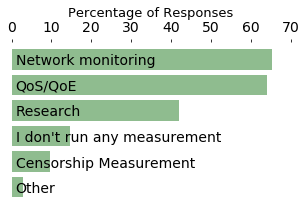

In [7]:
#Purpose of Running Business
def purpose_of_measurement():
    reasons =['Business Category',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Research]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Censorship_Measurement]',
              "6._Please_state_your_main_purpose_for_running_network_measurements?_[I_don't_run_any_measurement]",
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]']

    df2 = df[reasons]
    freq = []
    purpose = []
    other = 0
    for col in df2.columns[1:]:
        column = str(col)
        if col == "6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]":
            new_purpose = tuple(df2[col].dropna().unique())
            for purp in new_purpose:
                value = len(df2[['Business Category', column]][df2[column]==str(purp)])
                other += value
            perc = (other/len(df2)*100)
            freq.append(perc)
            purpose.append("Other")
        else:    
            value = len(df2[['Business Category', column]][df2[column]=="Yes"])
            perc = (value/len(df2)*100)
            freq.append(perc)
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)":
                ntype="QoS/QoE"
            purpose.append(ntype)
            
    final = dict(zip(purpose, freq)) #Creating dictionary based on the values in the two lists
    final = {k: v for k, v in sorted(final.items(), key=lambda x: x[1])} #Sorting dict by values

    fig, ax = plt.subplots(figsize=(5,3))
    final = {x.replace('_', ' '): v for x, v in final.items()}
    
    bars = plt.barh(*zip(*final.items()), height=.8, color='darkseagreen')
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-275)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Percentage of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,10,20,30,40,50,60,70])
    
    plt.savefig('figures/purpose.pdf', bbox_inches = 'tight')
    plt.show()

    return 
purpose_of_measurement()


Which of these performance indicators/metrics are important for your organisation/network?




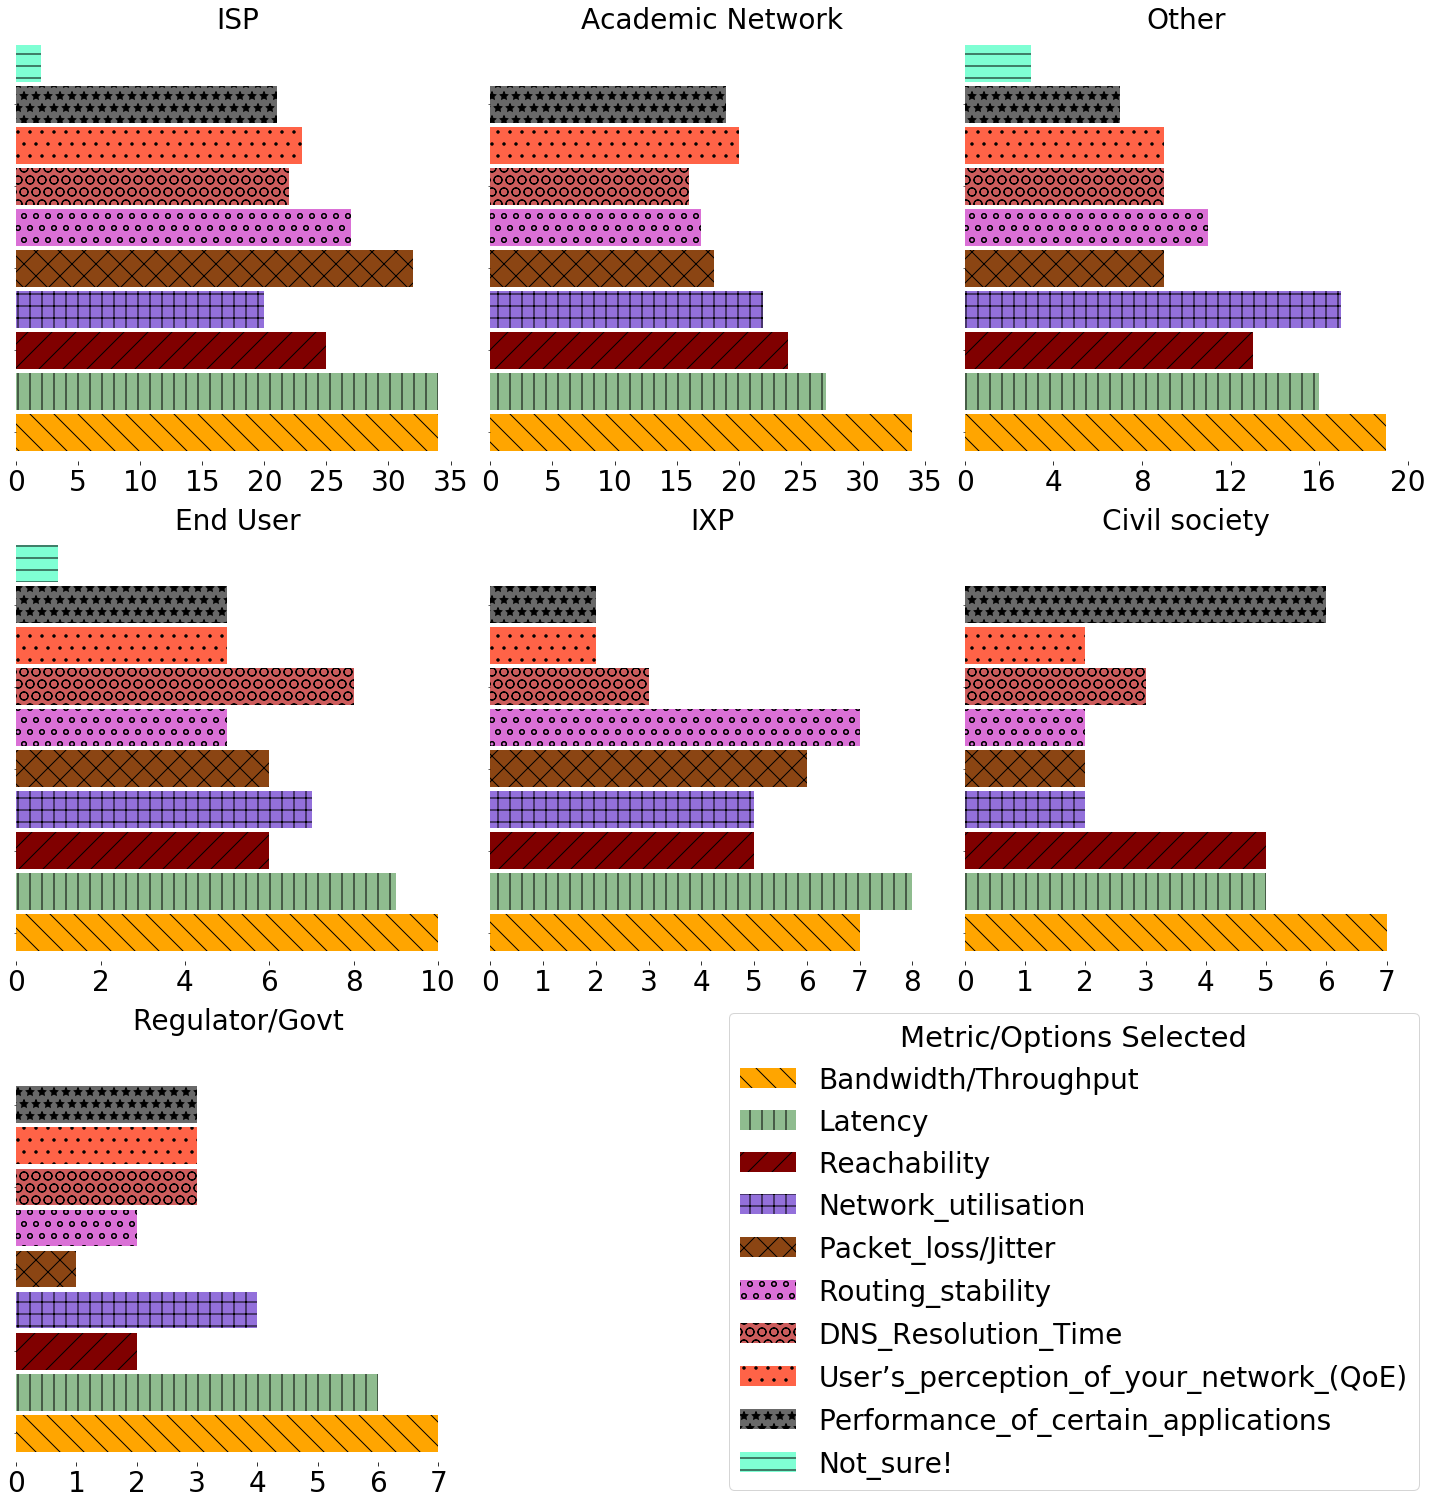

In [8]:
#The popular metrics
def metrics():
    metrics_list =['Business Category',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Latency]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Bandwidth/Throughput]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Packet_loss/Jitter]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[User’s_perception_of_your_network_(QoE)]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Reachability]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Routing_stability]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Performance_of_certain_applications_(Youtube,_Facebook,_etc)]]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Network_utilisation]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[DNS_Resolution_Time]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Not_sure!]',
 '7._Which_of_these_performance_indicators/metrics_are_important_for_your_organisation/network?_[Other]',]
    
    df1 = df[metrics_list]
    df1.replace(('Yes', 'No'),
                (1, 0), inplace=True)
    df1.set_index('Business Category', inplace=True)
    
    #Extract the required headings
    for col in df1.columns:
        name = col.split('[')[1].split(']')[0]
        if name == "Performance_of_certain_applications_(Youtube,_Facebook,_etc)":
            name=name.split("(")[0][:-1]
        df1.rename(columns={col:name}, inplace=True)
    
    df1.drop(['Other'], axis=1, inplace=True)
    df1 = df1.groupby(level=0, as_index=True).sum()
    
    df1.loc['Total',:]= df1.sum(axis=0)
    df1=df1[df1.iloc[-1,:].sort_values(ascending=False).index]
    df1['Total'] = df1.sum(axis=1)
    df1 = df1.sort_values(by='Total', ascending=False)
    
    i = j = roundcounter = 0
    patterns = ['\\', '|', '/', '+', 'x', 'o', 'O', '.', '*', '-']
    color=['orange', 'darkseagreen', 'maroon', 'mediumpurple', 'saddlebrown', 'orchid', 'indianred',
          'tomato', 'dimgrey', 'aquamarine'] 
    
    fig, axes = plt.subplots(3,3, sharex=False, sharey=True)
    print("\nWhich of these performance indicators/metrics are important for your organisation/network?\n\n")
    
    #Plot the graphs
    for col in df1[1:].index:
        bars = df1.loc[col].drop(['Total']).plot.barh(width=.9, figsize=(20, 21), color=color, ax=axes[i, j])
        
        for tick in axes[i, j].xaxis.get_major_ticks():
                tick.label.set_fontsize(28)
        
        axes[i, j].set_title(df1.loc[col].name, fontdict={'fontsize': 28, 'fontweight': 'medium'})
        axes[i, j].get_yaxis().set_ticklabels([])
        axes[i, j].tick_params(axis="y", which='major', length=0)

        for spine in axes[i, j].spines:
            axes[i, j].spines[spine].set_visible(False)

        for bar, pattern in zip(bars.patches, patterns):        
            bar.set_hatch(pattern)
        
        if j==2: 
            if roundcounter==0:
                roundcounter+=1
                i=1
                j=0
            elif roundcounter==1:
                roundcounter+=1
                j=0
                i=2
            elif roundcounter==2:
                i=2
                j=0
        elif j==1 or j==0:
                j+=1
        
    axes[0, 2].set_xticks([0, 4, 8, 12, 16, 20], minor=False)
    axes[2, 1].axis('off')
    axes[2, 2].axis('off')
    labels = df1.loc['Academic Network'].drop(['Total']).index.tolist()
    handles = [rect for rect in bars.get_children() if isinstance(rect, mpl.patches.Rectangle)]
    legend = fig.legend(handles, labels, loc=4, fontsize=28)
    legend.set_title('Metric/Options Selected',prop={'size':29})
    plt.savefig('figures/metrics.pdf', bbox_inches="tight")
    fig.tight_layout()
    plt.show()
    return
metrics()

In [9]:
#level of aggregation
def aggr():
    #10. What level of data aggregation is important for your organisation? 
    columns = ['Business Category',
               '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[AS_level]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[PoP_level]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[City_level]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[Country_level]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[Regional_level]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[Global_level]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[Not_sure!]',
 '10._What_level_of_data_aggregation_is_important_for_your_organisation?\n\n\t\xa0_[Other]']
    
    df1 = df[columns]
    df1.set_index('Business Category', inplace=True)
    df1.replace(('Yes', 'No', np.nan), (1,0,0), inplace=True)
    df1 = df1.groupby(level=0).sum()
    df1.loc['Total',:]= df1.sum(axis=0)
    df1=df1[df1.iloc[-1,:].sort_values(ascending=False).index]
    df1['Total'] = df1.sum(axis=1)
    df1 = df1.sort_values(by='Total', ascending=False)
    return #df1
aggr()

In [10]:
#Popular Platforms
def platforms():
    columns = ['Business Category',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[RIPE_Atlas]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[MLAB/NDT]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[Speedchecker]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[CAIDA_Ark]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[PerfSONAR]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[Personal_Computer]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[Bismark_Nodes]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[N/A]',
               '9._What_tools_do_you_use_to_perform_the_measurement?\n\n\t\xa0_[Other]',]
    
    df1 = df[columns]
    df1.replace(('Yes', 'No'),
                (1, 0), inplace=True)
    df1.set_index('Business Category', inplace=True)
    
    for col in df1.columns:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
  
    df1.drop(['Other'], axis=1, inplace=True)
    df1 = df1.groupby(level=0, as_index=True).sum()

    #Add Total for sorting purposes.
    df1.loc['Total',:]= df1.sum(axis=0)
    df1=df1[df1.iloc[-1,:].sort_values(ascending=False).index]
    df1['Total'] = df1.sum(axis=1)
    df1 = df1.sort_values(by='Total', ascending=False)
    
    
    cols = df1.columns.tolist()[:-1]
    sums = round((df1.loc['Total']/total_responses)*100, 2)
    #Calculate percentage for each value
    df1[cols] = round(df1[cols].div(df1[cols].drop(['Total']).sum(axis=0), axis = 1).multiply(100), 2)
    #print("What_tools_do_you_use_to_perform_the_measurement?\n\nResults in Percentage".replace("_"," "))
    return #df1.iloc[1:].append(sums).drop(['Total','N/A'], axis=1).fillna(0)
platforms()

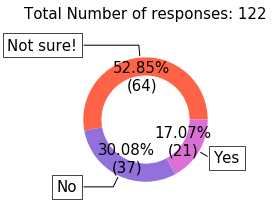

In [11]:
#Privacy Laws
def privacy_laws():
    #Respondent with no idea about privacy laws
    df.rename(columns={'16._Are_there_privacy_laws_regulating_passive_network_measurement_in_your_country?':\
                      'Privacy'}, inplace=True)    
    values = df['Privacy'].value_counts().values.tolist()
    labels = df['Privacy'].value_counts().index.tolist()
    
    #display percentage and values in the donut
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.2f}%\n({:d})".format(pct, absolute)
    
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    colors=['tomato', 'mediumpurple', 'orchid'] 
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    
    wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values), colors=colors,
                                  textprops=dict(fontsize=15), pctdistance=0.7)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, size=15, **kw)
    ax.set_title('Total Number of responses: 122\n', fontsize=15)
    plt.tight_layout()
    plt.savefig('figures/privacy.pdf')
    return 
privacy_laws()

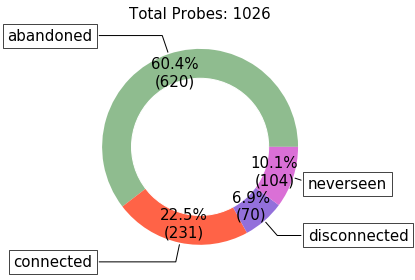

In [12]:
#RIPE statistics
def ripe_stats():
    ripe = pd.read_csv('ripestat_10_05_19.csv')
    
    ripe.set_index('date', inplace=True)
    total_probes = ripe.loc['Total'][4]
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)    
    
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    colors=['darkseagreen', 'tomato', 'mediumpurple', 'orchid'] 
    ripe = ripe.loc['Total'][:-1]
    fig, ax = plt.subplots(figsize=(7, 4), subplot_kw=dict(aspect="equal"))
    values = ripe.values.tolist()
    labels = ripe.index.tolist()
    wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values), colors=colors,
                                  textprops=dict(fontsize=15), pctdistance=0.8)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, size=15, **kw)
    
    ax.set_title('Total Probes: {}'.format(total_probes), fontsize=15)
    plt.tight_layout()
    plt.savefig('figures/ripestat.pdf')
    return 
ripe_stats()

In [13]:
#Duration of Collected Data
def duration():   
    df1 = df[['Business Category', '11._What_duration_of_collected_data_is_important_for_your_analysis?']]     
    duration_level = df1.groupby('11._What_duration_of_collected_data_is_important_for_your_analysis?')
    return duration_level.describe()
duration()

Business Category         \
                                                               count unique   
11._What_duration_of_collected_data_is_importan...                            
1-2 years                                                         41      7   
2-3 years                                                         14      5   
Less than a year                                                  48      7   
More than 3 years                                                 13      5   
Not sure!                                                         19      6   

                                                                           
                                                                 top freq  
11._What_duration_of_collected_data_is_importan...                         
1-2 years                                                        ISP   14  
2-3 years                                           Academic Network    8  
Less than a year                                                 ISP   14  
More than 3 years                                                ISP    4  
Not sure!                                                      Other    6

In [14]:
#Tools for data analysis
def tools():
    columns = ['Business Category',
              '13._If_you_collect_measurement_data,_which_tools_do_use_to_analyse_your_data?_[I_don’t_do_any_analysis/visualisation]',
 '13._If_you_collect_measurement_data,_which_tools_do_use_to_analyse_your_data?_[MS_Excel]',
 '13._If_you_collect_measurement_data,_which_tools_do_use_to_analyse_your_data?_[Python_tools]',
 '13._If_you_collect_measurement_data,_which_tools_do_use_to_analyse_your_data?_[R_tools]',
 '13._If_you_collect_measurement_data,_which_tools_do_use_to_analyse_your_data?_[Other]',]
    
    df1 = df[columns]
    df1.replace(('Yes', 'No'), (1, 0), inplace=True)
    df1.columns = df1.columns.str.replace("_", " ")
    
    for col in df1.columns[1:]:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
        df1.replace('_', ' ', inplace=True)
        name = str(name)
        if name == 'Other':
            length = len(df1['Other'].dropna())
            percent = round((length/total_responses)*100, 2)
            print('The number of respondents who selected Other is {} or {}%'.format(length, percent))
        else:
            length = len(df1.loc[df1[name] == 1])
            percent = round((length/total_responses)*100, 2)
            print('The number of respondents who selected {} is {} or {}%'.format(name, length, percent))
    

    return
tools()

The number of respondents who selected I don’t do any analysis/visualisation is 56 or 41.18%
The number of respondents who selected MS Excel is 49 or 36.03%
The number of respondents who selected Python tools is 17 or 12.5%
The number of respondents who selected R tools is 13 or 9.56%
The number of respondents who selected Other is 21 or 15.44%


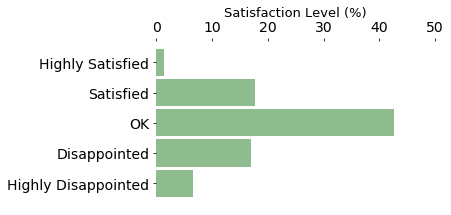

In [15]:
def likert():
    df1 = df[['Business Category', 
              '18._How_satisfied_are_you_with_the_currently_available_Internet_measurement_platforms_in_Africa_as_listed_in_the_previous_question?_1:_Highly_Disappointed;_5:_Highly_Satisfied']]
    df1.rename(columns={'18._How_satisfied_are_you_with_the_currently_available_Internet_measurement_platforms_in_Africa_as_listed_in_the_previous_question?_1:_Highly_Disappointed;_5:_Highly_Satisfied':\
                        'Likert Scale'}, inplace=True)
    
    df1.set_index('Business Category', inplace=True)
    df1.dropna(inplace=True)
    
    likert={} 
    grouped={}
    for value in df1['Likert Scale'].unique():
        option = "option_{}".format(value)
        likert[option] = df1.loc[df1['Likert Scale'] == value]
        total = likert[option].groupby(level=0).describe()['Likert Scale', 'count'].sum()
        percent = round((total/total_responses)*100, 2)
        grouped.update({option:percent})
    
    
    grouped['Highly Disappointed'] = grouped.pop('option_1')
    grouped['Disappointed'] = grouped.pop('option_2')
    grouped['OK'] = grouped.pop('option_3')
    grouped['Satisfied'] = grouped.pop('option_4')
    grouped['Highly Satisfied'] = grouped.pop('option_5')
    
    fig, ax = plt.subplots(figsize=(5,3))
    bars = plt.barh(*zip(*grouped.items()), height=.9, color='darkseagreen')
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.set_xlabel('Satisfaction Level (%)', fontdict={'fontsize': 13})
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.savefig('figures/likert.pdf', bbox_inches = 'tight')        
    return
likert()

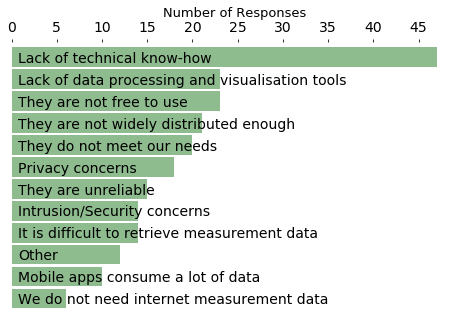

In [16]:
#Reasons for not using platforms
def not_using():
    columns = ['23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[They_do_not_meet_our_needs_(for_e.g.,_some_features_are_not_available)]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[They_are_not_widely_distributed_enough]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[They_are_unreliable]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[It_is_difficult_to_retrieve_measurement_data]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[Intrusion/Security_concerns]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[Privacy_concerns]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[They_are_not_free_to_use]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[Lack_of_data_processing_and_visualisation_tools]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[Mobile_apps_consume_a_lot_of_data]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[Lack_of_technical_know-how]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[We_do_not_need_internet_measurement_data]',
 '23._What_are_the_main_reasons_you_are_not_using_any_of_the_available_Internet_measurement_platforms_(or_are_using_but_in_a_limited_way)?_[Other]']
    
    df1 = df[columns]
    df1.replace(('Yes', 'No'), (1, 0), inplace=True)
    df1.columns = df1.columns.str.replace("_", " ")
    for col in df1.columns:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
        #df1[name].replace('_', ' ', inplace=True)
        
    df1.rename(columns={'They do not meet our needs (for e.g., some features are not available)':\
                       'They do not meet our needs'}, inplace=True)
    
    df1['Other'] = df1['Other'].notnull().astype(int) #Change text to 1 and NaN to 0
    df1.loc['Total',:]= df1.sum(axis=0)
    
    data = df1.T['Total'].sort_values()
    ax = data.plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-440)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,5,10,15,20,25,30,35,40,45])
    plt.savefig('figures/platforms_use.pdf', bbox_inches = 'tight')
    plt.show()
    return 
not_using()

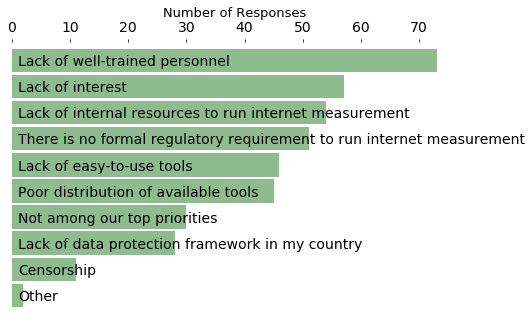

In [17]:
#Factors hindering
def not_using():
    columns = ['27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[There_is_no_formal_regulatory_requirement_to_run_internet_measurement]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Lack_of_data_protection_framework_in_my_country]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Lack_of_internal_resources_to_run_internet_measurement]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Lack_of_easy-to-use_tools]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Poor_distribution_of_available_tools]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Lack_of_interest]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Lack_of_well-trained_personnel]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Censorship]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Not_among_our_top_priorities]',
 '27._Which_of_these_factors_is_hindering_Internet_measurement_in_Africa?_(Select_as_many_as_you_think_are_applicable)_[Other]']
    
    df1 = df[columns]
    df1.replace(('Yes', 'No'), (1, 0), inplace=True)
    df1.columns = df1.columns.str.replace("_", " ")
    for col in df1.columns:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
   
    df1['Other'] = df1['Other'].notnull().astype(int) #Change any text in the column to 1 and NaN to 0
    df1.loc['Total',:]= df1.sum(axis=0)
    
    data = df1.T['Total'].sort_values()
    ax = data.plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-440)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,10,20,30,40,50,60,70])
    plt.savefig('figures/hinder.pdf', bbox_inches = 'tight')
    plt.show()
    return 
not_using()

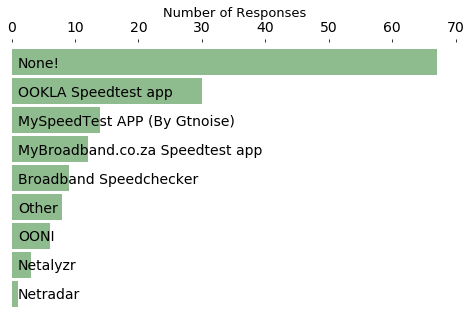

In [18]:
#Mobile Measurement App usage
def mobileApp():
    cols = ['Business Category',
           '21._Do_you_currently_use_any_mobile_measurement_app?_[OOKLA_Speedtest_app]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[MySpeedTest_APP_(By_Gtnoise)]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[MyBroadband.co.za_Speedtest_app]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[Netalyzr]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[Broadband_Speedchecker]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[Netradar]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[OONI]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[None!]',
 '21._Do_you_currently_use_any_mobile_measurement_app?_[Other]',]
    
    df1 = df[cols]
    df1.replace(('Yes', 'No'), (1, 0), inplace=True)
    df1.columns = df1.columns.str.replace("_", " ")
    dic = {}
    for col in df1.columns[1:]:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
        name = str(name)
    df1 = df1.set_index('Business Category')
    df1['Other'] = df1['Other'].notnull().astype(int) #Change text to 1 and NaN to 0
    df1 = df1.append(df1.sum().rename('Total'))
    df1['Total']=df1.drop(['None!'], axis=1).sum(axis=1)
    data = df1.T['Total'].sort_values()
    ax = data.drop('Total').plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-440)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,10,20,30,40,50,60,70])
    plt.savefig('figures/mobileplat.pdf', bbox_inches = 'tight')
    plt.show()
    return
mobileApp()